In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/yousuf/Downloads/bank/bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


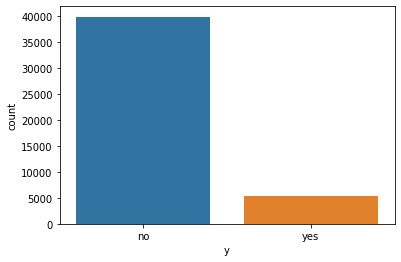

In [5]:
sns.countplot('y',data=df)

In [6]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
39922/len(df)

0.8830151954170445

Text(0.5, 0, 'Age')

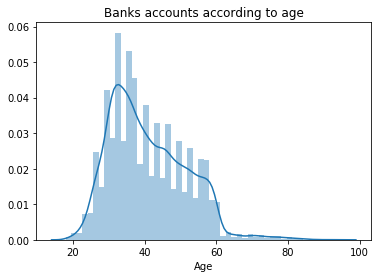

In [9]:
plt.title('Banks accounts according to age')
sns.distplot(df.age)
plt.xlabel('Age')

In [10]:
sub_df=df.loc[(df.age>=30) & (df.age<=50),['balance','job','age']]

In [11]:
sub_df

,balance,job,age
1,29,technician,44
2,2,entrepreneur,33
3,1506,blue-collar,47
4,1,unknown,33
5,231,management,35
...,...,...,...
45198,1428,management,37
45199,1475,blue-collar,34
45200,557,technician,38
45202,557,admin.,34


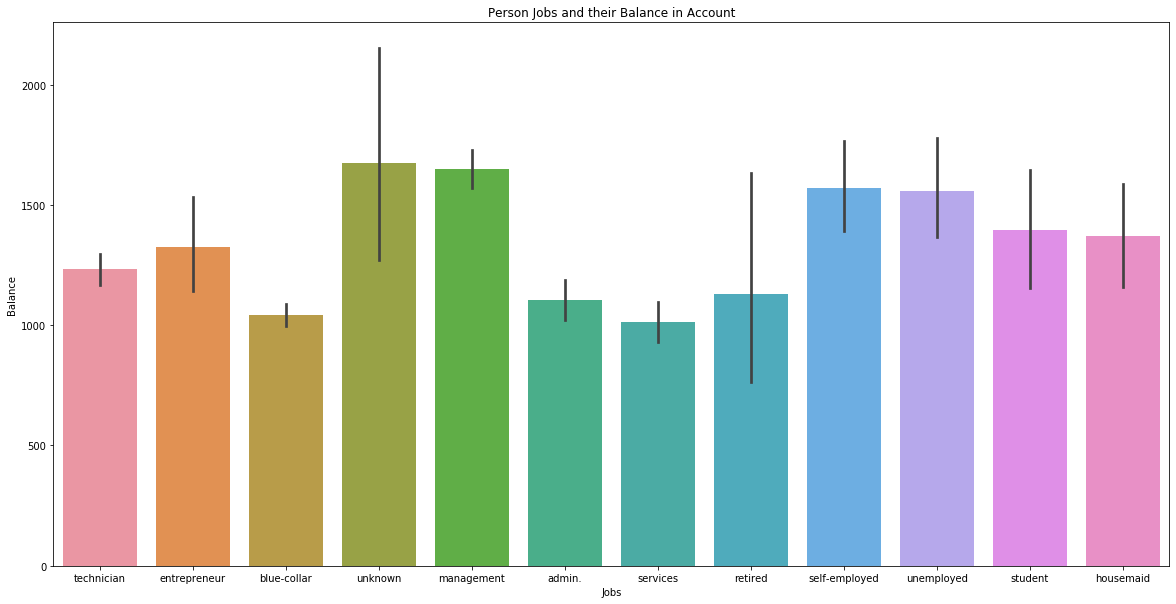

In [16]:
plt.figure(figsize=(20,10))
plt.title('Person Jobs and their Balance in Account')
sns.barplot(x='job',y='balance',data=sub_df)
plt.xlabel('Jobs')
plt.ylabel('Balance')
plt.show()

In [42]:
print('Maximum Balance in Account '+str(df.balance.max()))
print('Person Job Who got highiest Balance '+str(df.loc[df.balance==102127,'job'].values[0]))

Maximum Balance in Account 102127
Person Job Who got highiest Balance management


In [49]:
print('Minimum Balance in Account '+str(df.balance.min()))
print('Person Job Who got lowest Balance '+str(df.loc[df.balance==-8019,'job'].values[0]))

Minimum Balance in Account -8019
Person Job Who got lowest Balance blue-collar


In [11]:
df[df.balance==102127]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


In [12]:
df[df.balance==-8019]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no


In [13]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [69]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb=LabelEncoder()

In [18]:
df.job=lb.fit_transform(df.job)

In [19]:
df.marital=lb.fit_transform(df.marital)
df.education=lb.fit_transform(df.education)
df.default=lb.fit_transform(df.default)
df.housing=lb.fit_transform(df.housing)
df.loan=lb.fit_transform(df.loan)
df.contact=lb.fit_transform(df.contact)
df.month=lb.fit_transform(df.month)
df.poutcome=lb.fit_transform(df.poutcome)

In [20]:
df.y=lb.fit_transform(df.y)

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [22]:
X=df.drop('y',axis=1)
y=df.iloc[:,-1].values

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
scaled_train=scaler.transform(X)


In [27]:
scaled_train

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.21215596, 0.01090909,
        0.66666667],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.21674312, 0.04      ,
        0.33333333]])

In [28]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [39]:
n_features=16
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(n_features,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 5,169
Trainable params: 5,169
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test=train_test_split(scaled_train,y,test_size=0.3)

In [44]:
from keras.callbacks import EarlyStopping

In [45]:
early=EarlyStopping(monitor='val_loss',patience=5)

In [46]:
model.fit(scaled_train,y,epochs=100,validation_data=(X_test,y_test),callbacks=[early])

Train on 45211 samples, validate on 13564 samples
Epoch 1/100
45211/45211 [==============================] - 2s 37us/step - loss: 0.2953 - accuracy: 0.8883 - val_loss: 0.2473 - val_accuracy: 0.8964
Epoch 2/100
45211/45211 [==============================] - 1s 31us/step - loss: 0.2485 - accuracy: 0.8958 - val_loss: 0.2379 - val_accuracy: 0.8963
Epoch 3/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2429 - accuracy: 0.8974 - val_loss: 0.2375 - val_accuracy: 0.8976
Epoch 4/100
45211/45211 [==============================] - 1s 33us/step - loss: 0.2399 - accuracy: 0.8976 - val_loss: 0.2320 - val_accuracy: 0.8997
Epoch 5/100
45211/45211 [==============================] - 1s 31us/step - loss: 0.2374 - accuracy: 0.8999 - val_loss: 0.2266 - val_accuracy: 0.9011
Epoch 6/100
45211/45211 [==============================] - 1s 31us/step - loss: 0.2362 - accuracy: 0.8991 - val_loss: 0.2266 - val_accuracy: 0.9015
Epoch 7/100
45211/45211 [==============================] - 1s 

Epoch 56/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2062 - accuracy: 0.9106 - val_loss: 0.2014 - val_accuracy: 0.9143
Epoch 57/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2065 - accuracy: 0.9105 - val_loss: 0.1996 - val_accuracy: 0.9141
Epoch 58/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2055 - accuracy: 0.9110 - val_loss: 0.1999 - val_accuracy: 0.9146
Epoch 59/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2054 - accuracy: 0.9112 - val_loss: 0.1992 - val_accuracy: 0.9171
Epoch 60/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2048 - accuracy: 0.9107 - val_loss: 0.2006 - val_accuracy: 0.9136
Epoch 61/100
45211/45211 [==============================] - 1s 33us/step - loss: 0.2051 - accuracy: 0.9114 - val_loss: 0.1995 - val_accuracy: 0.9133
Epoch 62/100
45211/45211 [==============================] - 1s 32us/step - loss: 0.2041 - accuracy: 0.9111

In [47]:
metrics=pd.DataFrame(model.history.history)

In [48]:
metrics.keys()

Index(['val_loss', 'val_accuracy', 'loss', 'accuracy'], dtype='object')

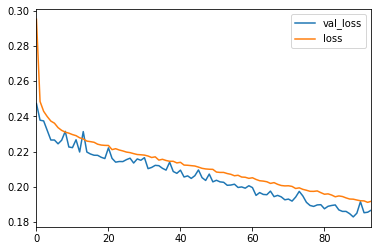

In [49]:
metrics[['val_loss','loss']].plot()

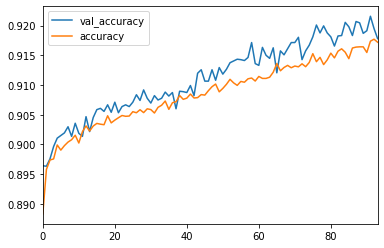

In [50]:
metrics[['val_accuracy','accuracy']].plot()

In [51]:
y_pred=model.predict_classes(X_test)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [53]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12018
           1       0.68      0.53      0.60      1546

    accuracy                           0.92     13564
   macro avg       0.81      0.75      0.78     13564
weighted avg       0.91      0.92      0.91     13564



In [56]:
from sklearn.metrics import confusion_matrix

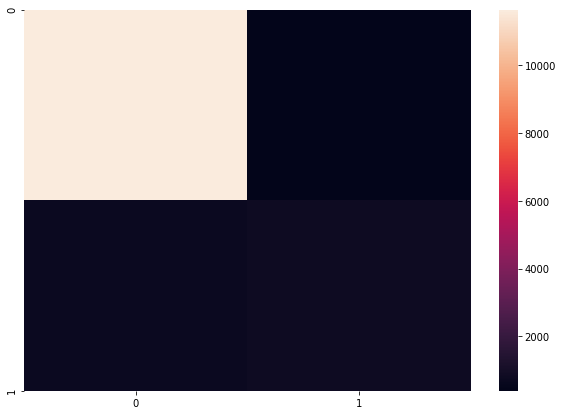

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [84]:
import random

random.seed(42)
random_ind=random.randint(0,len(df))

new_customer=df.drop('y',axis=1).iloc[random_ind]

In [85]:
new_customer

age           43
job            9
marital        1
education      1
default        0
balance       69
housing        1
loan           1
contact        0
day           20
month         10
duration     304
campaign       1
pdays        337
previous       1
poutcome       0
Name: 41905, dtype: int64

In [87]:
new_customer=scaler.transform(new_customer.values.reshape(1,16))

In [89]:
model.predict_classes(new_customer)

array([[0]])

In [91]:
df.iloc[random_ind]['y']

0